<a href="https://colab.research.google.com/github/yallavaibhav/Comic-AudioBooks/blob/vaibhav/Contouring_final_with_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 5.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [3]:
import cv2 as cv
import pandas as pd
import easyocr
import matplotlib.pyplot as plt
import numpy as np

In [4]:
img = cv.imread('/content/Screenshot 2023-03-18 235352.png')


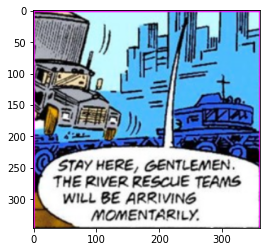

In [5]:
plt.imshow(img)

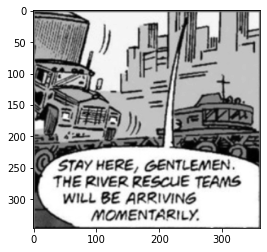

In [9]:
#Gray Scaling
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')

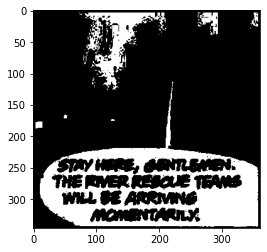

In [23]:
#Thresholding
_,binary = cv.threshold(gray,244,255,cv.THRESH_BINARY)
plt.imshow(binary, cmap='gray')

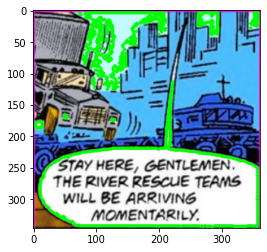

In [24]:
Thresh_original = cv.imread('/content/Screenshot 2023-03-18 235352.png')
contours1, hirechay1 = cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
con_thresh = cv.drawContours(Thresh_original,contours1, -1,(0,255,0),3) #-1 is to detect all contours, (255,255,255)=>green line, 3=> thickness
plt.imshow(con_thresh)

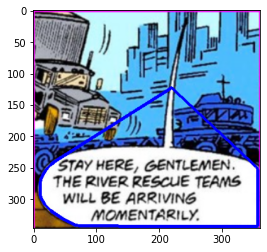

In [60]:

#Biggest contours
Hull_biggestarea = cv.imread('/content/Screenshot 2023-03-18 235352.png')
biggest_contours = max(contours1, key = cv.contourArea)
hull_biggest = cv.convexHull(biggest_contours)
# con_hull = cv2.drawContours(Hull_original,[hull],0,(0,0,220),3)
# plt.imshow(con_hull)
p = cv.drawContours(Hull_biggestarea,[hull_biggest],0,(0,0,255),3)
plt.imshow(Hull_biggestarea)

In [61]:
# We finf the center point also

In image processing, a mask is a binary image that specifies which parts of the original image should be included or excluded in a particular operation. A mask is essentially a region of interest (ROI) that is defined by a binary image.
In the example code snippet I provided earlier, we created a mask using the hull points of the contour. The cv2.drawContours() function is used to draw the hull points onto a blank mask image. The mask argument is then used in the cv2.bitwise_and() function to extract only the pixels from the original image that correspond to the white pixels in the mask image.
So in this case, the mask specifies which pixels from the original image should be included in the output image. The white pixels in the mask indicate the pixels that should be included, while the black pixels indicate the pixels that should be excluded. By using a mask, we can extract only the parts of the original image that correspond to the hull shape of the contour, while ignoring everything else.
In summary, the mask is used to specify a region of interest in an image, which can be used to extract or manipulate only the pixels within that region.

In the example code snippet I provided earlier, we used cv2.bitwise_and() to extract the hull shape of the contour from the original image. The first two arguments to cv2.bitwise_and() are the original image and itself (i.e., a copy of the original image). The third argument is the mask image we created using the hull points of the contour.

By using cv2.bitwise_and() with the mask image, we extract only the pixels from the original image that correspond to the hull shape of the contour, while setting all other pixels to zero. This allows us to create an image that only shows the hull shape of the contour, with a black background.

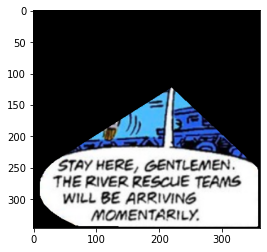

In [63]:
#Finally, we apply the mask to the original image using the cv2.bitwise_and() function to extract the hull shape
mask = np.zeros(gray.shape, np.uint8)
cv.drawContours(mask, [hull_biggest], 0, 255, -1)

# Apply the mask to the original image to extract the hull shape

result = cv.bitwise_and(img, img, mask=mask)
plt.imshow(result)

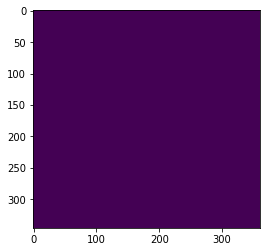

In [65]:
mask = np.zeros(gray.shape, np.uint8)
plt.imshow(mask)

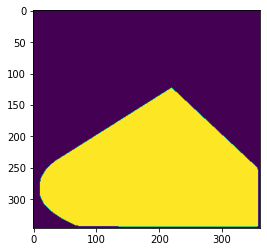

In [66]:
pp = cv.drawContours(mask, [hull_biggest], 0, 255, -1)
plt.imshow(pp)

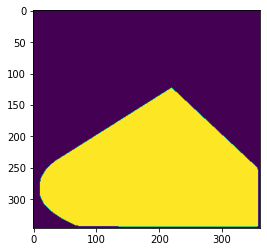

In [67]:
plt.imshow(mask)

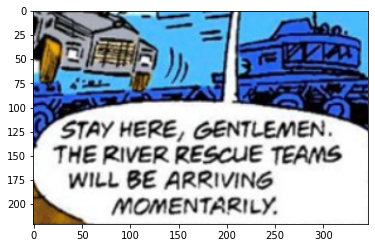

In [62]:
x, y, w, h = cv.boundingRect(hull_biggest)

# Crop the original image using the bounding rectangle
crop_img = img[y:y+h, x:x+w]

# Display the cropped image
plt.imshow( crop_img)

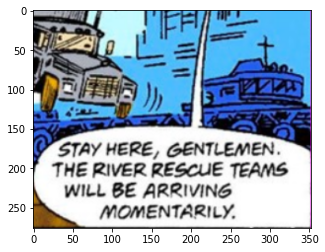

In [56]:
# import platform
# import cv2
# import numpy as np

# # Load the image
# img = cv2.imread('/content/Screenshot 2023-03-18 235352.png')

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Apply thresholding to convert the image to a binary image
# ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# # Find contours in the binary image
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # Find the contour with the largest area
# max_area = 0
# max_contour = None
# for contour in contours:
#     area = cv2.contourArea(contour)
#     if area > max_area:
#         max_area = area
#         max_contour = contour

# # Find the bounding rectangle of the contour
# x, y, w, h = cv2.boundingRect(max_contour)

# # Crop the original image using the bounding rectangle
# crop_img = img[y:y+h, x:x+w]

# # Display the cropped image
# plt.imshow( crop_img)

In [70]:
cv.imwrite("new.jpg",result)

True

In [1]:
#Preprocessing

In [6]:
x = cv.imread('/content/new.jpg')

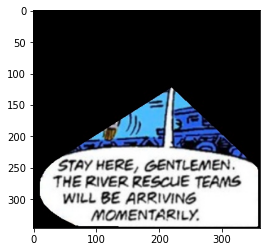

In [7]:
plt.imshow(x)

In [8]:
import easyocr

reader = easyocr.Reader(['en'],gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [9]:
results = reader.readtext(x)
results

[([[36, 232], [320, 232], [320, 262], [36, 262]],
  'STAY Here  GENTLEMEN)',
  0.24658514966163111),
 ([[30, 257], [336, 257], [336, 288], [30, 288]],
  'The River ReScue TEAMS',
  0.2555793065835132),
 ([[44, 284], [262, 284], [262, 314], [44, 314]],
  'Will Be Arriving',
  0.4746463822388449),
 ([[90, 312], [268, 312], [268, 338], [90, 338]],
  'MOMENTArily;',
  0.35884241265896616)]

In [10]:
grayy = cv.cvtColor(x,cv.COLOR_BGR2GRAY)
results = reader.readtext(grayy)
results

[([[36, 232], [320, 232], [320, 262], [36, 262]],
  'STAY Here  GENTLEMEN)',
  0.24658514966163111),
 ([[30, 257], [336, 257], [336, 288], [30, 288]],
  'The River ReScue TEAMS',
  0.2555793065835132),
 ([[44, 284], [262, 284], [262, 314], [44, 314]],
  'Will Be Arriving',
  0.4746463822388449),
 ([[90, 312], [268, 312], [268, 338], [90, 338]],
  'MOMENTArily;',
  0.35884241265896616)]

equalizeHist is a method in OpenCV's image processing library that performs histogram equalization on an input image.

Histogram equalization is a technique used to enhance the contrast of an image by redistributing pixel intensities. The goal is to improve the visibility of details in an image that may be hidden due to poor contrast.

The equalizeHist method takes a grayscale image as input and applies histogram equalization to the image. It computes a histogram of the pixel intensities in the input image and then performs a cumulative distribution function (CDF) on the histogram to obtain a lookup table. The lookup table is then used to map the original pixel intensities to new intensities, which produces the output image with improved contrast.

In [11]:
enhanced = cv.equalizeHist(grayy)

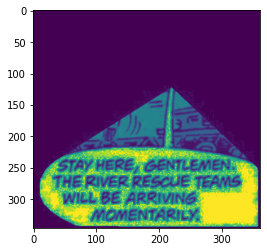

In [12]:
plt.imshow(enhanced)

In [13]:
results = reader.readtext(enhanced)
results

[([[36, 232], [166, 232], [166, 260], [36, 260]],
  'StaY Here',
  0.482519371198965),
 ([[174, 234], [328, 234], [328, 260], [174, 260]],
  'GentLEMEN:',
  0.31796612294525284),
 ([[30, 256], [336, 256], [336, 288], [30, 288]],
  'The River rescue TEAMS',
  0.49479966540830866),
 ([[44, 284], [264, 284], [264, 312], [44, 312]],
  'Will Be Arriving',
  0.3961516150940608),
 ([[90, 312], [272, 312], [272, 340], [90, 340]],
  'MOMENTRRILY ',
  0.3715662753173653)]

In [19]:
resized = cv.resize(enhanced, (0,0), fx=1, fy=1)
results = reader.readtext(resized)
results

[([[36, 232], [166, 232], [166, 260], [36, 260]],
  'StaY Here',
  0.482519371198965),
 ([[174, 234], [328, 234], [328, 260], [174, 260]],
  'GentLEMEN:',
  0.31796612294525284),
 ([[30, 256], [336, 256], [336, 288], [30, 288]],
  'The River rescue TEAMS',
  0.49479966540830866),
 ([[44, 284], [264, 284], [264, 312], [44, 312]],
  'Will Be Arriving',
  0.3961516150940608),
 ([[90, 312], [272, 312], [272, 340], [90, 340]],
  'MOMENTRRILY ',
  0.3715662753173653)]

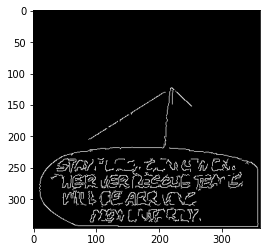

In [25]:
# edges = cv.Canny(resized,300,500)
# plt.imshow(edges,cmap = 'gray')

In [26]:
# results = reader.readtext(edges)
# results

[([[36, 229], [326, 229], [326, 262], [36, 262]],
  'Sicy "LC~c_rG~Cl',
  0.004199105246932764),
 ([[41, 253], [341, 253], [341, 289], [41, 289]],
  'WEI? 4E2/2222U TEY _',
  0.012877921800346028),
 ([[44, 284], [262, 284], [262, 316], [44, 316]],
  'VHT! Og ARK',
  0.020991569429237064),
 ([[87, 311], [270, 311], [270, 341], [87, 341]],
  'NEAUTFRUZ,',
  0.07370466416218571)]

[([[28, 26], [124, 26], [124, 52], [28, 52]], 'BREAK', 0.916970936506614),
 ([[36, 50], [94, 50], [94, 76], [36, 76]], 'Him ', 0.39558079838752747)]

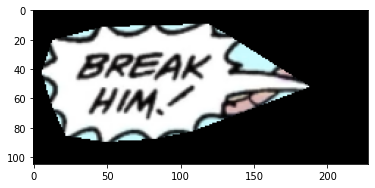

In [83]:
def crop_convex_hull(img):
  Thresh_original = img.copy()
  Hull_biggestarea = img.copy()
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  _,binary = cv.threshold(gray,244,255,cv.THRESH_BINARY)
  contours1, hirechay1 = cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
  con_thresh = cv.drawContours(Thresh_original,contours1, -1,(0,255,0),3) #-1 is to detect all contours, (255,255,255)=>green line, 3=> thickness
  #plt.imshow(con_thresh)
  #Biggest contours
  biggest_contours = max(contours1, key = cv.contourArea)
  hull_biggest = cv.convexHull(biggest_contours)
  cv.drawContours(Hull_biggestarea,[hull_biggest],0,(0,0,255),3)
  mask = np.zeros(gray.shape, np.uint8)
  cv.drawContours(mask, [hull_biggest], 0, 255, -1)
  result = cv.bitwise_and(img, img, mask=mask)
  plt.imshow(result)
  results = reader.readtext(result)
  return results
  # return result

def preprocess_text(images):
  gray = cv.cvtColor(images, cv.COLOR_BGR2GRAY)
  enhanced = cv.equalizeHist(gray)
  results = reader.readtext(enhanced)
  return results

img = cv.imread('/content/Screenshot 2023-03-20 221926.png')
#preprocess_text(crop_convex_hull(img))
crop_convex_hull(img)


In [71]:
 preprocess_text(img)

[]